&copy; Copyright 2016 Dr Marta Milo and Dr Mike Croucher, University of Sheffield. 


# Week 5 Practical 


This Notebook contains practical assignments for Week 4. 

It contains guidance on how to implement basic *workflow* for gene expression data analysis. It constists in the following steps

* **Step1**: Load packages with data from Bioconductor and/or access it from file in the data directory
* **Step 2**: Arrange the data in an affybatch using Bioconductor commands. Annotate the PhenoData
* **Step 3**: Analysis of gene expression data with different methods and normalisation techniques
* **Step 4**: Diagnostics of the data with plotting techniques
* **Step 5**: Basic use of limma and puma for Differential Expression Analysis
* **Step 6**: Visualisation of the data with PCA
* **Step 7**: Hierarchical clustering of DE (Differentially Expressed) genes
* **Step 8**: Functional analysis of DE targets using PANTHER or DAVID
* **Step 9**: Pathway analysis using PANTHER

As for the other practicals, this notebook also contains practical tasks that you will have to implement yourself. In this paractical you will find small tasks within the main one that is to implement the workflow specified above. 


We will use data that is stored in the preprocessed Bioconductor packages for this task and if we will need to access data, it will be stored in your SageMathCloud folder. You are free to base your work on the examples given here but you are also welcome to use different methods if you prefer, adding and/or creating new ways of displaying the data, as long as they are justified and are coherent with the task you are carrying forward. 


Remeber to use Bioconductor website as a reference and to search for user guides: https://www.bioconductor.org/

** Please be aware ** that Bioconductor has many different packages which change/update very frequently, this might couse problem with the install of them onto SageMathCloud. If you need help on packeges installation please contact Dr Marta Milo and/or Dr Mike Croucher. 

To complete this practical, **you will need to create a new notebook in the Week 5 folder of your SageMathCloud account** that you will call **your username_week5.ipynb**.

The notebooks assessed but formative feedback will be minimal and ONLY in case of completely wrong implementation clear explanation will be given. This is because your final task will consist in a similar exercise but on real and previously unseen data. 

All the notebooks are meant to be used interactively.  All the code needs to be written into *code* cells -- that can be executed by an R kernel. The outputs are not present in this notebook, but the code cells are executable.

**We will be plotting large amounts of data. To avoid problems with file size, you should run the following line which changes plot outputs to small .png files**

```R
options(jupyter.plot_mimetypes ='image/png')
```

### Exercise
Implement the FULL workflow as described above on the estrogen data. Below are TIPS and SUGGESTIONS for each of the above steps.


**Step 1**:
Load data from the data directory `data_wk5` using the command `load(estrogen_data.RDA)`. Ensure that you have loaded the data checking with `ls()`. the data summarises a time series experiement of human cells in culture growing in the presence or absence of the estrogen hormon. samples were taken after 10hrs and 48hrs, for the treated  (estrogen present) and untreated (estrogen absent).

Activate the package `affy` and wait to activate puma til after processing the data with `rma`, because in some cases creates a conflict within some of `affy` commands. After processing the affybatch, activate the others relevant libraries for cmpleting this analysis when you need them. 



In [1]:
options(jupyter.plot_mimetypes ='image/png')

In [ ]:
load("./data_wk_5/estrogen_data.RDA")
ls()
library(affy)

**Step 2**:Annotate the `pData` with the `pData()` command.


**Step 3**:Calculate gene expression with at least one single point statitics method and puma. 
To avoid waiting time for the calclualtion of gene expression with puma load the data from the data folder using `load("eset_puma.RDA")`

**Step 4**: Use the plot tools we have seen in the Week5 practical and the `MAplot()` from `limma`. Remember to exececute `library(limma)` before doing so. Explore the command with the estrogen data. Does it make sense to use an `MAplot()` directly on the eset? What bout the code below?

In [ ]:
groups<-c("A10","A10","P10","P10","A48","A48","P48","P48")
table_estrogen<-data.frame(sampleNames(eset_estrogen_puma),groups)
group10hr<-factor(groups[1:4])

MAplot(eset_estrogen_puma[,1:4], pairs=TRUE, groups=group10hr)

Use this suggestion to explore the data. 


**Step 5**: Before performing any type of DE analysis you need to combine the data as explained in the lectures. For `puma` we combine the data using an bayesian Hierarchical model, which might take some time when implemented on data with the comand `pumaCombImproved()`.
Load the puma combined data for this exercise from the data folder using the command `load("eset_puma_comb.RDA")`.


We have seen in week 4 initial use of `limma` for DE analysis. Remember the three core steps of `limma`
* **Step 1**: build the design contrast matrix
* **Step 2**: fit the linear model
* **Step 3**: calculate the p-values and FDRs with a empirical Bayes test
we used built-in function in `puma` to create the design and constrast matrix. We can also use the following code to create thoese matrices.

```R
group<-factor(c("A10","A10","P10","P10","A48","A48","P48","P48"))
design<-model.matrix(~0+group)
colnames(design)<-c("A10","P10","A48","P48")

constrast.matrix<-makeContrasts(A10-P10,A48-P48,levels=design)

fit<-lmFit(eset_estrogen,design)
fit2<-contrasts.fit(fit,constrast.matrix)
fit2<-eBayes(fit2)
```

Extract the top DE genes using `topTable()` as seen in week10. Explore the results. You might want to extract more genes from using topTable... look at the parameters.( n=100, for examples...)


Rembenber the threshold for selecting FC after they passed the significance threhold is FC<-1 and FC>1. Assign the thresholds to variables in the script, this helps to modify them and keep the code correct. In this way you will change only the value of one variable and not in all instances when it is recalled.  

In [71]:
topDEGenes<-topTable(fit2, coef=1, adjust="BH", n=100)

To do the DE analysis with `puma` use the puma combined data stored in the expression set `eset_estrogen_comb`. Then use the command `pumaDE()`. the user guide is available to download from the website. 


Remember to activate the package `puma`

Example of use extracted from the userguide is:


To identify genes that are differentially expressed between the conditions
use the pumaDE function. 
```R
pumaDERes <- pumaDE(eset_estrogen_comb)
```
The results of this command are ranked gene lists. If we want to write out the statistics of differential expression (the PPLR values), and the fold change values, we use the command `write.reslts()`.
```R
write.reslts(pumaDERes, file="pumaDERes")
```

Always make sure that the p-values are distributed as expected. Use the `hist()` to diagnose this.

In [ ]:
par(mfrow=c(1,2))
hist(fit2$p.value[,1], main="A10 vs P10")
hist(fit2$p.value[,2], main="A48 vs P48")

**BEFORE** continuing with more analysis we need to *annotate* the probeset_IDs with gene names and symbols. We can use 
```R
library(annotate)
library(hgu95av2.db)
```
to do this. `hu95av2` is the database for the annotation of the geneChip we are using. To annotate the list of selected genes you need to use the command `select()`. Below is an example of this:
```R
geneProbes<-as.character(rownames(topGenes))
annotated_list<-select(hgu95av2.db, geneProbes,c("SYMBOL","GENENAME"))
```


**Step 6**: Pricipal component analysis. 

You can perform PCA in R using the command `prcomp()`. This is an example:
```R
pca_estrogen <- prcomp(t(exprs(eset_estrogen)))
```
It needs the traspose command `t()` since the input for the `prcomp()` wants the genes in the columns. You can plot it using:

```R
plot(pca_estrogen$x, xlab="Component 1", ylab="Component 2", pch=unclass(as.factor(pData(eset_estrogen)[,1])), col=unclass(as.factor(pData(eset_estrogen)[,2])), main="Standard PCA")

groups<-paste(eset_estrogen$condition,eset_estrogen$time.h, sep =" ")
legend(0,0,groups,pch=unclass(as.factor(pData(eset_estrogen)[,1]))
, col=unclass(as.factor(pData(eset_estrogen)[,2])))
```


For probabilistic PCA you can use `pumaPCA()` as below:

```R
pumapca_estrogen<-pumaPCA(eset_estrogen_puma)
plot(pumapca_estrogen)
```


**Step 7**: Hierarchical clustering

To perform this we need to activate a library called `gplots`. We will use the command `heatmap.2()`.
We do clustering a the selected genes from our DE analysis this is to search for patterns in of differentially regulatend pathways.

For example for the RMA processed we can do:


In [76]:
rownames(topDEGenes)

[1] "AFFX-CreX-5_at"  "AFFX-CreX-3_at"  "AFFX-BioDn-5_at" "AFFX-BioB-M_at" 
  [5] "AFFX-BioDn-3_at" "39581_at"        "AFFX-BioC-3_at"  "37014_at"       
  [9] "2004_at"         "AFFX-BioC-5_at"  "34363_at"        "38065_at"       
 [13] "40071_at"        "33730_at"        "32597_at"        "1034_at"        
 [17] "41386_i_at"      "910_at"          "AFFX-BioB-3_at"  "35059_at"       
 [21] "33899_at"        "38116_at"        "1651_at"         "40079_at"       
 [25] "1197_at"         "38814_at"        "40759_at"        "39397_at"       
 [29] "35995_at"        "AFFX-BioB-5_at"  "35224_at"        "37026_at"       
 [33] "36617_at"        "34717_s_at"      "34472_at"        "40690_at"       
 [37] "39560_at"        "1945_at"         "2010_at"         "32239_at"       
 [41] "36631_at"        "31867_at"        "881_at"          "38368_at"       
 [45] "34736_at"        "37409_at"        "37895_at"        "39092_at"       
 [49] "960_g_at"        "32448_at"        "543_g_at"        "39926_at"       
 [53] "37828_at"        "37331_g_at"      "37250_at"        "32263_at"       
 [57] "1272_at"         "1035_g_at"       "406_at"          "40407_at"       
 [61] "32143_at"        "472_at"          "32750_r_at"      "37758_s_at"     
 [65] "1998_i_at"       "37669_s_at"      "36845_at"        "35442_at"       
 [69] "34112_r_at"      "40881_at"        "927_s_at"        "1943_at"        
 [73] "37405_at"        "40631_at"        "33836_at"        "41635_at"       
 [77] "471_f_at"        "36958_at"        "39154_at"        "36288_at"       
 [81] "34863_s_at"      "39174_at"        "40441_g_at"      "37000_at"       
 [85] "37009_at"        "32215_i_at"      "35303_at"        "39330_s_at"     
 [89] "34728_g_at"      "37362_at"        "40182_s_at"      "41565_at"       
 [93] "36432_at"        "38974_at"        "41342_at"        "35437_at"       
 [97] "38661_at"        "38068_at"        "39907_at"        "41231_f_at"

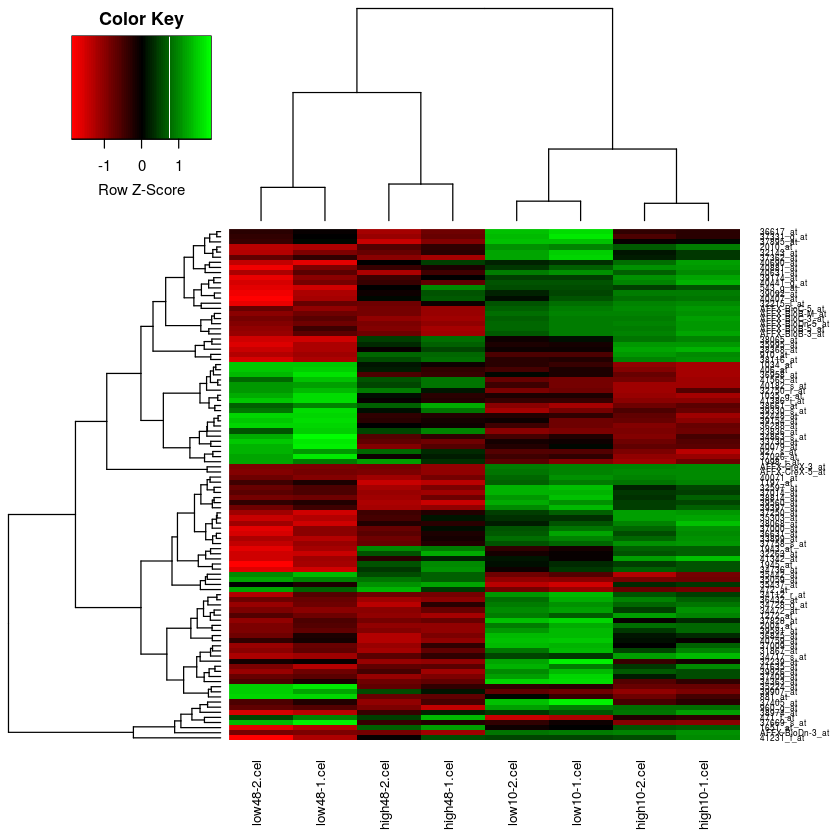

In [77]:
library(gplots)

# find the IDs that belong to the DE genes.
tID<-rownames(topDEGenes)
ind<-1
j<-1
for (i in 1: length(tID)) {
	ind[j]<-which(rownames(eset_estrogen)==tID[i],arr.ind=TRUE)
	j<-j+1
}

# ind is the vector with all the indexes
topExpr<-exprs(eset_estrogen)[ind,]
heatmap.2(topExpr, col=redgreen(75), scale="row",
key=TRUE, symkey=FALSE, density.info="none", trace="none", cexRow=0.5, cexCol=0.8)

If you want to change rownames and column, save the list into a dataframe and chage the rownames with the gene SYMBOL.


For **Step 7 and 8** you need to use the lists of symbols and upload them onto the web portal. Save the SYMBOL into a tab delimited file and use that into the PANTHER web portal.